<a href="https://colab.research.google.com/github/Jjmoreno24/Auto_escala_POV_ray/blob/main/Yolo11_Detecction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu Oct 24 05:27:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.1/877.1 kB 36.9 MB/s eta 0:00:00


In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.2/112.6 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="W4t3yLsoCP1wfCtfVsmQ")
project = rf.workspace("ulises-antonio-dios-bazn").project("epp-construccion")
version = project.version(5)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to EPP-CONSTRUCCION-5 in yolov11:: 100%|██████████| 5450/5450 [00:00<00:00, 5550.09it/s]


In [6]:
dataset.location

'/content/EPP-CONSTRUCCION-5'

In [7]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=50 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 178MB/s]
Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/EPP-CONSTRUCCION-5/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=

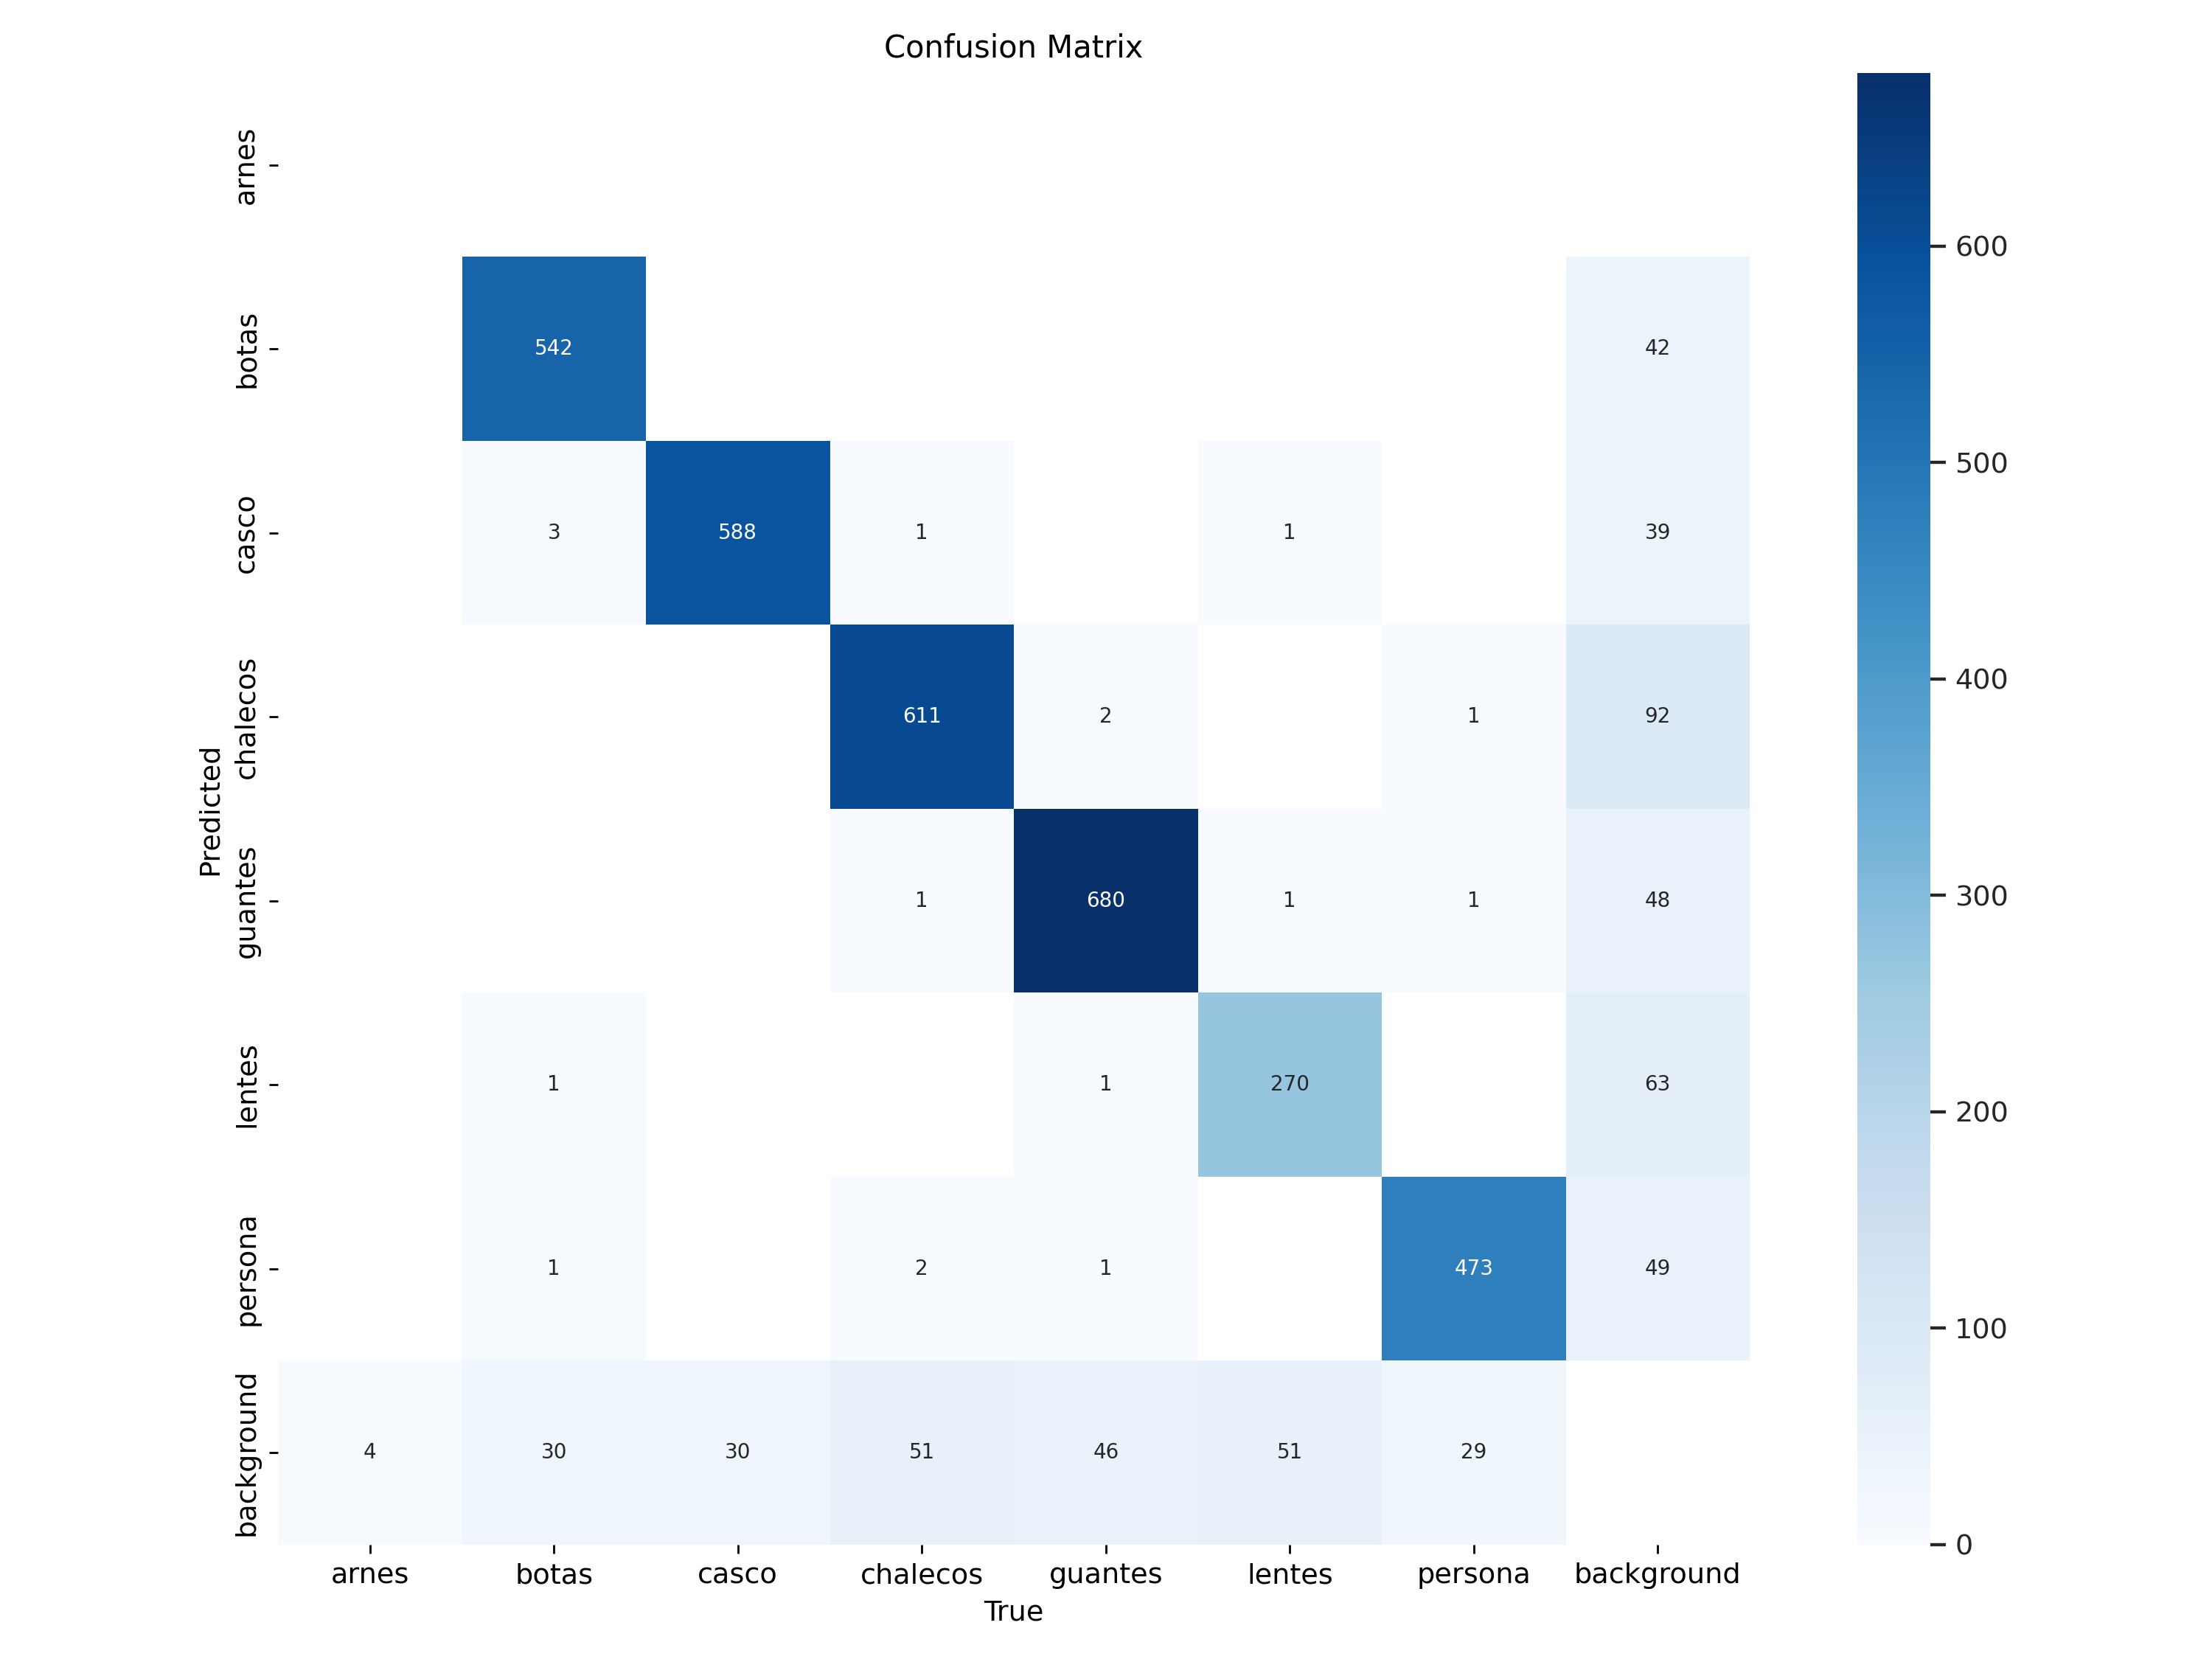

In [8]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

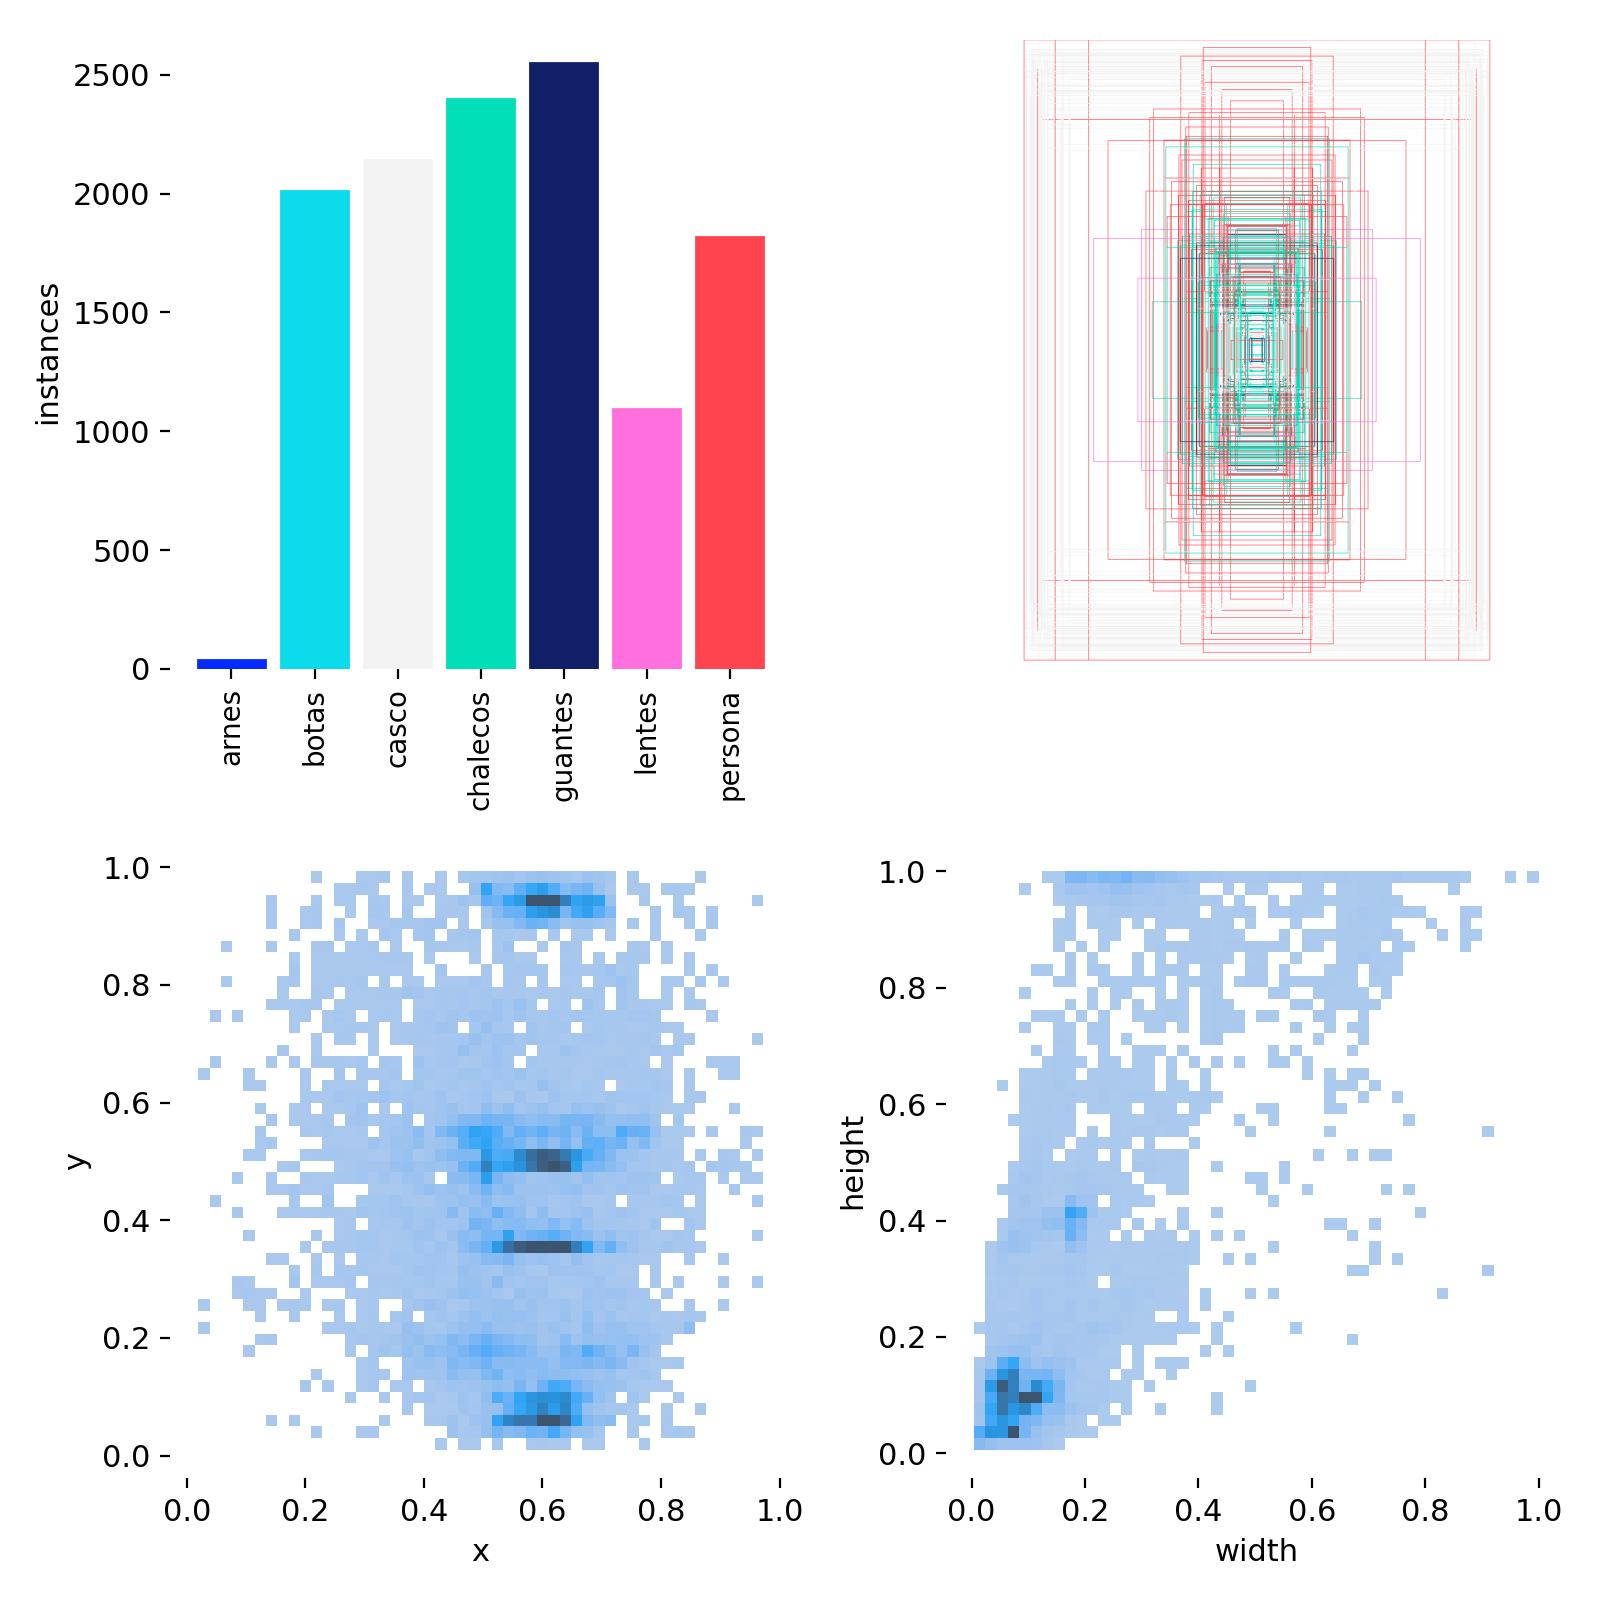

In [9]:
Image("/content/runs/detect/train/labels.jpg", width=600)

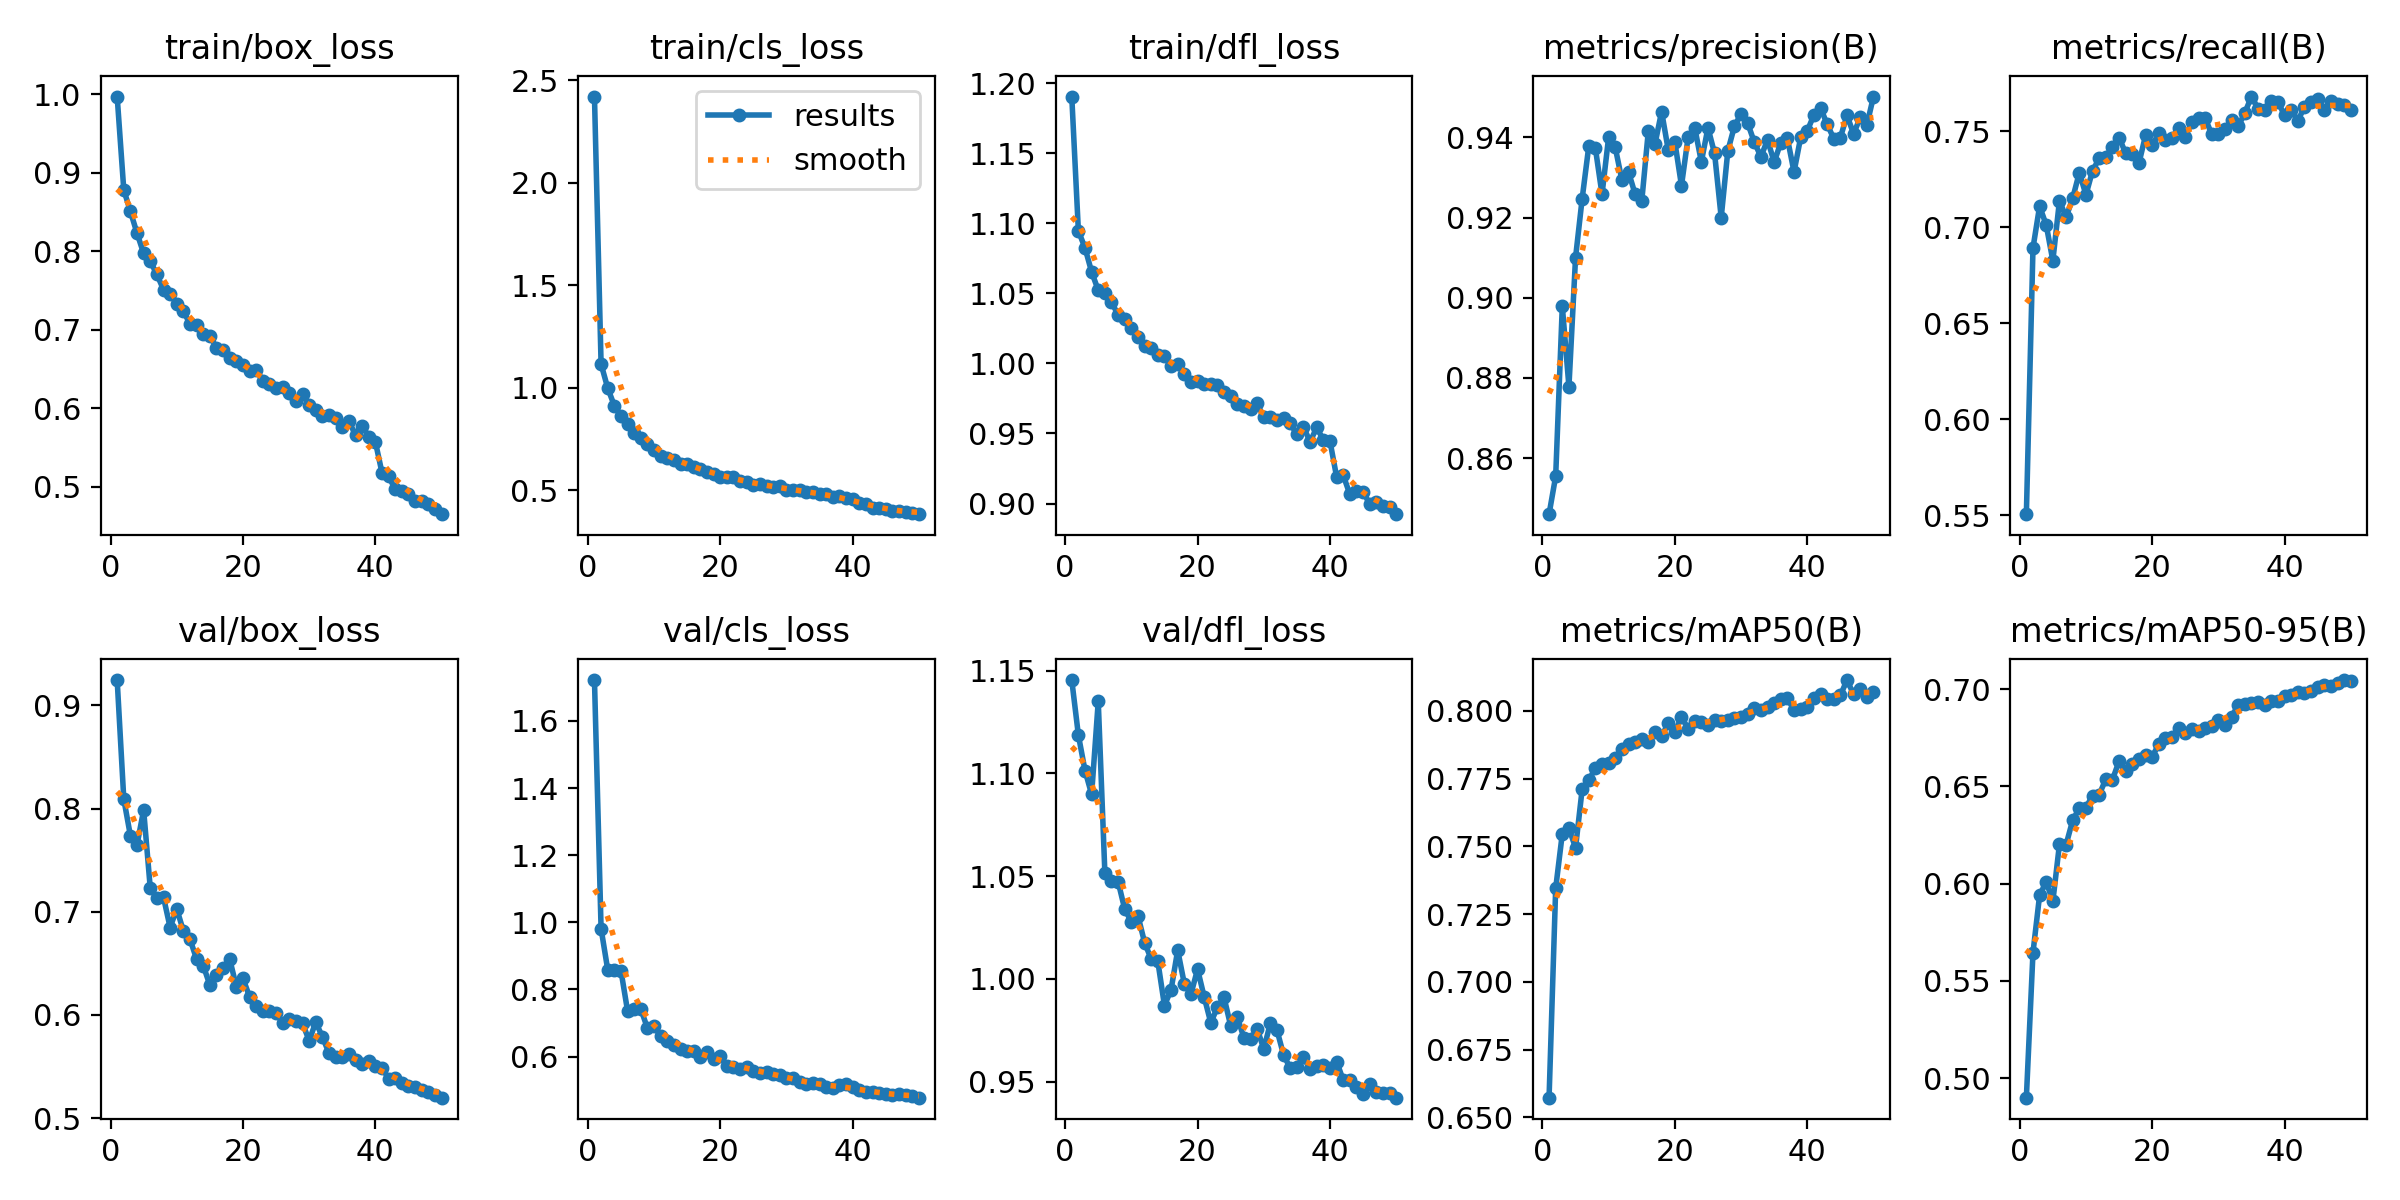

In [10]:
Image("/content/runs/detect/train/results.png", width=600)

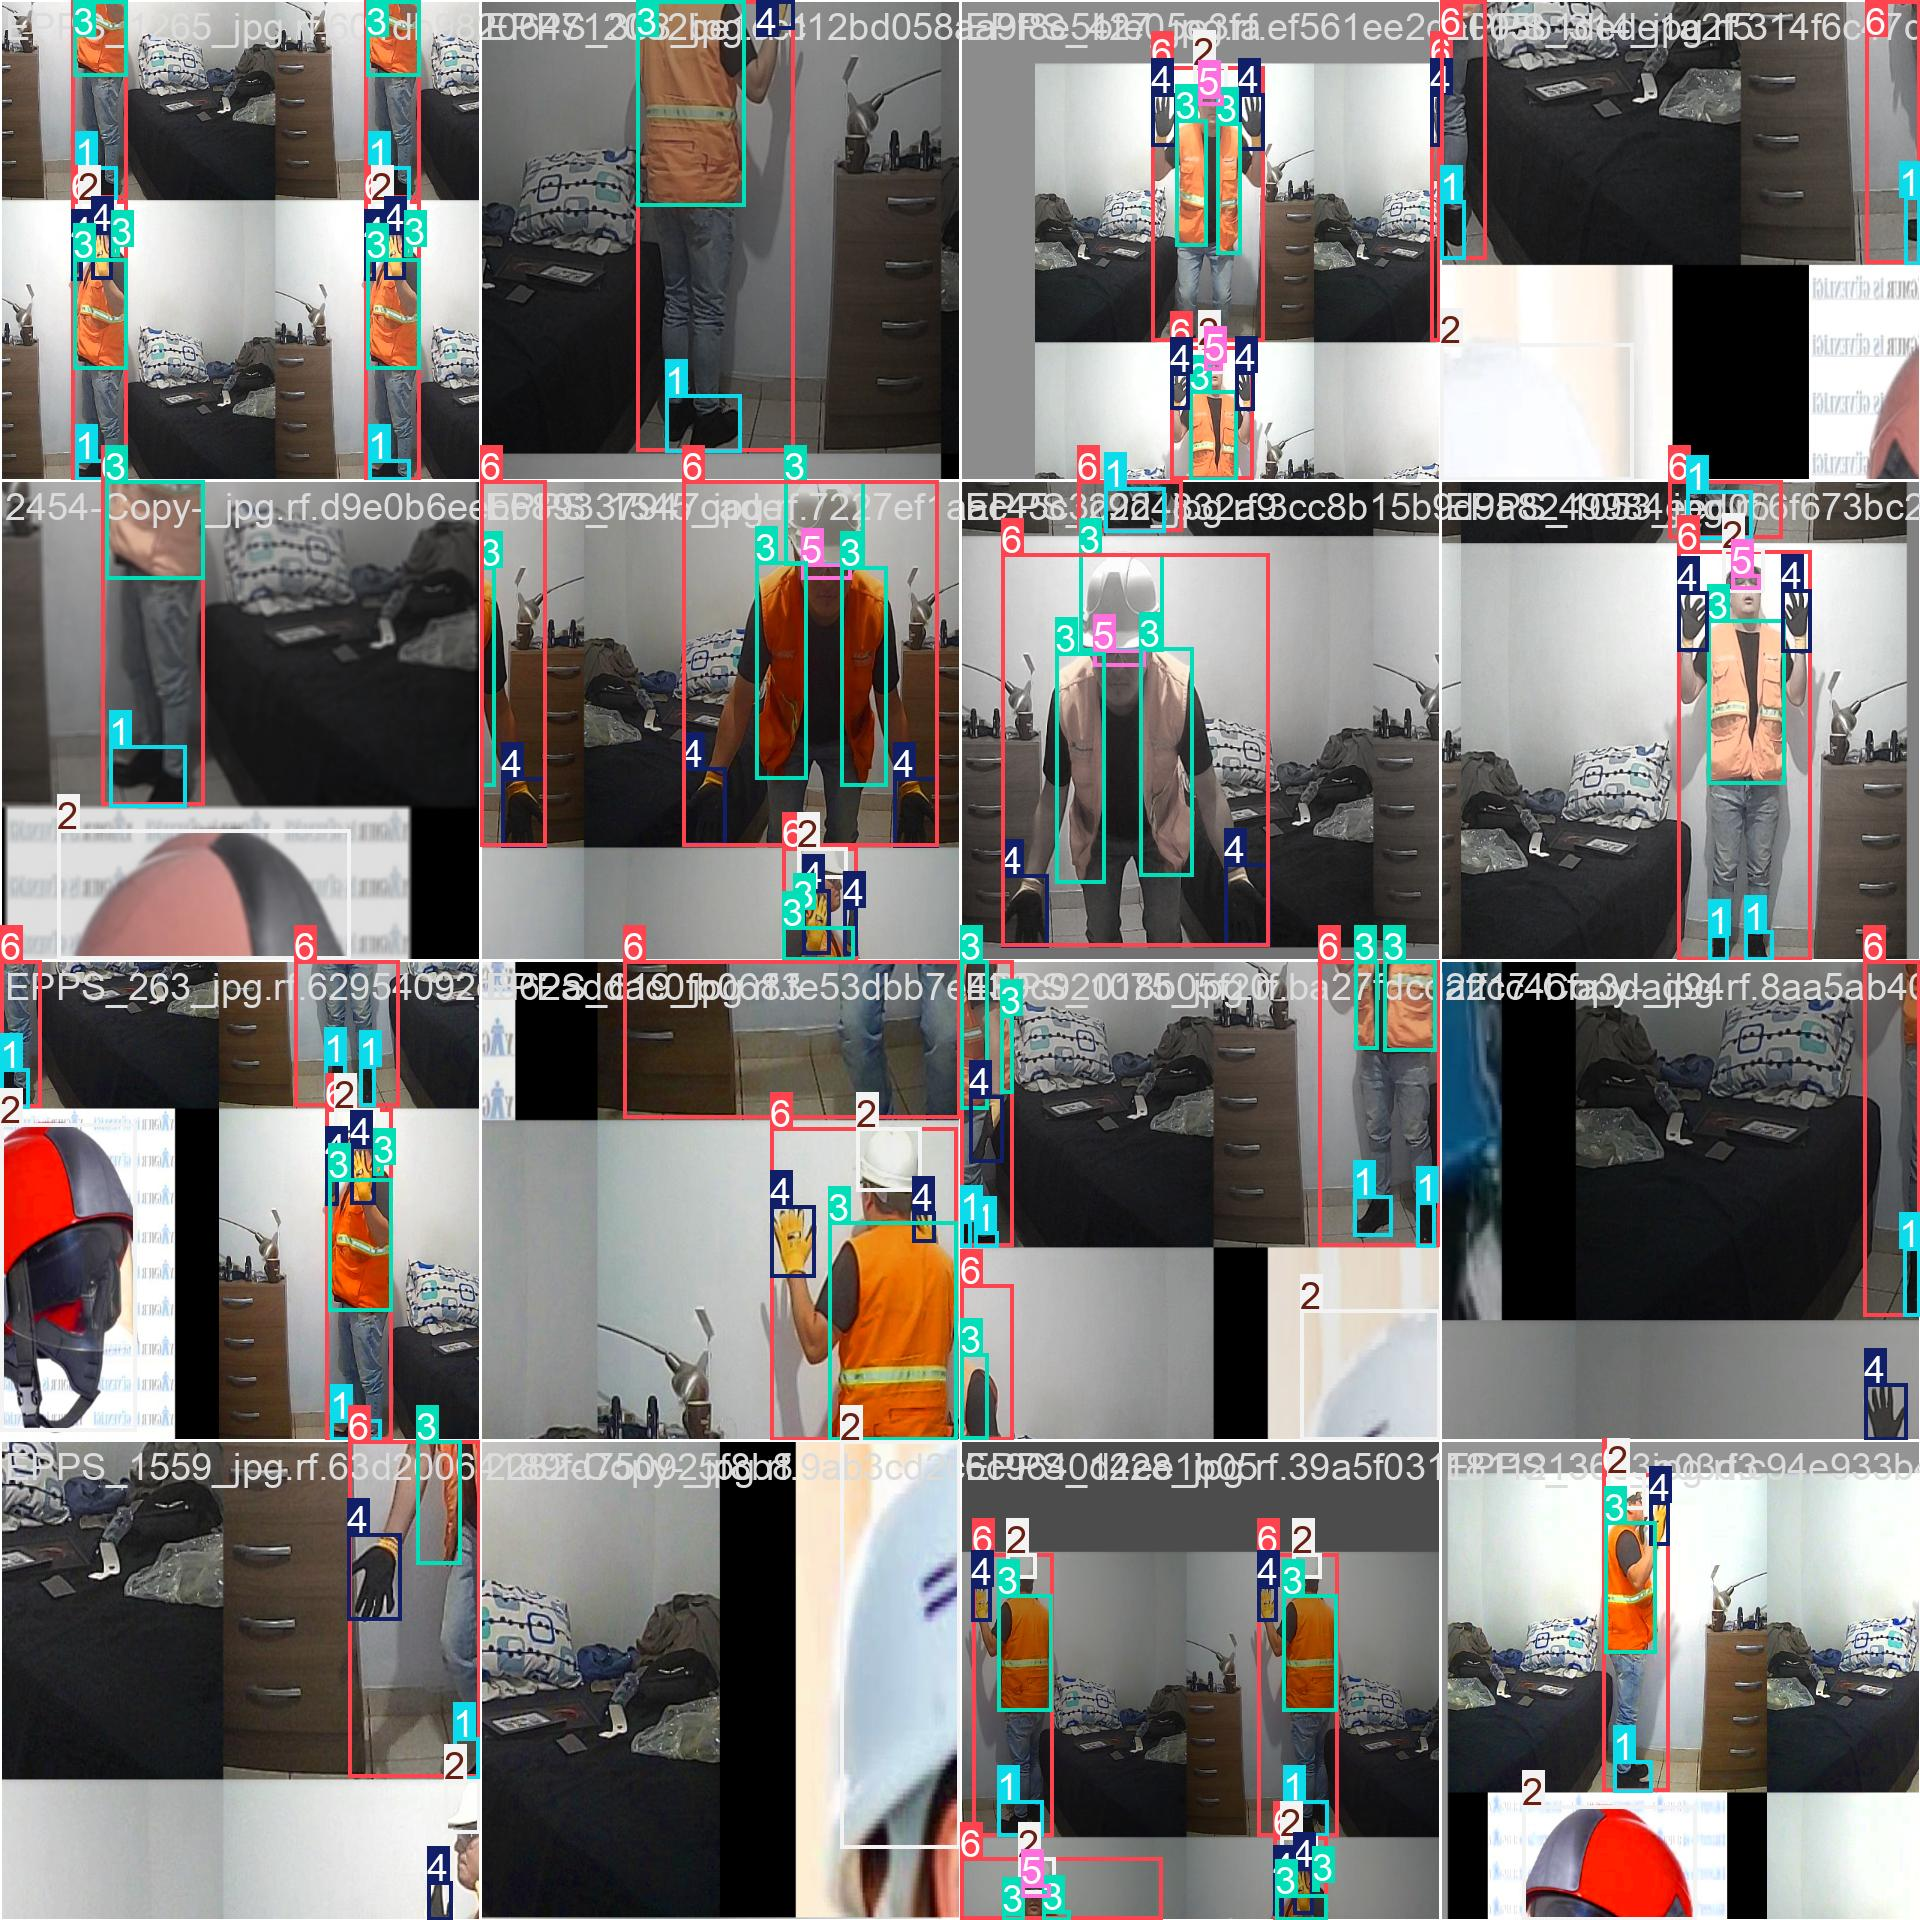

In [11]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

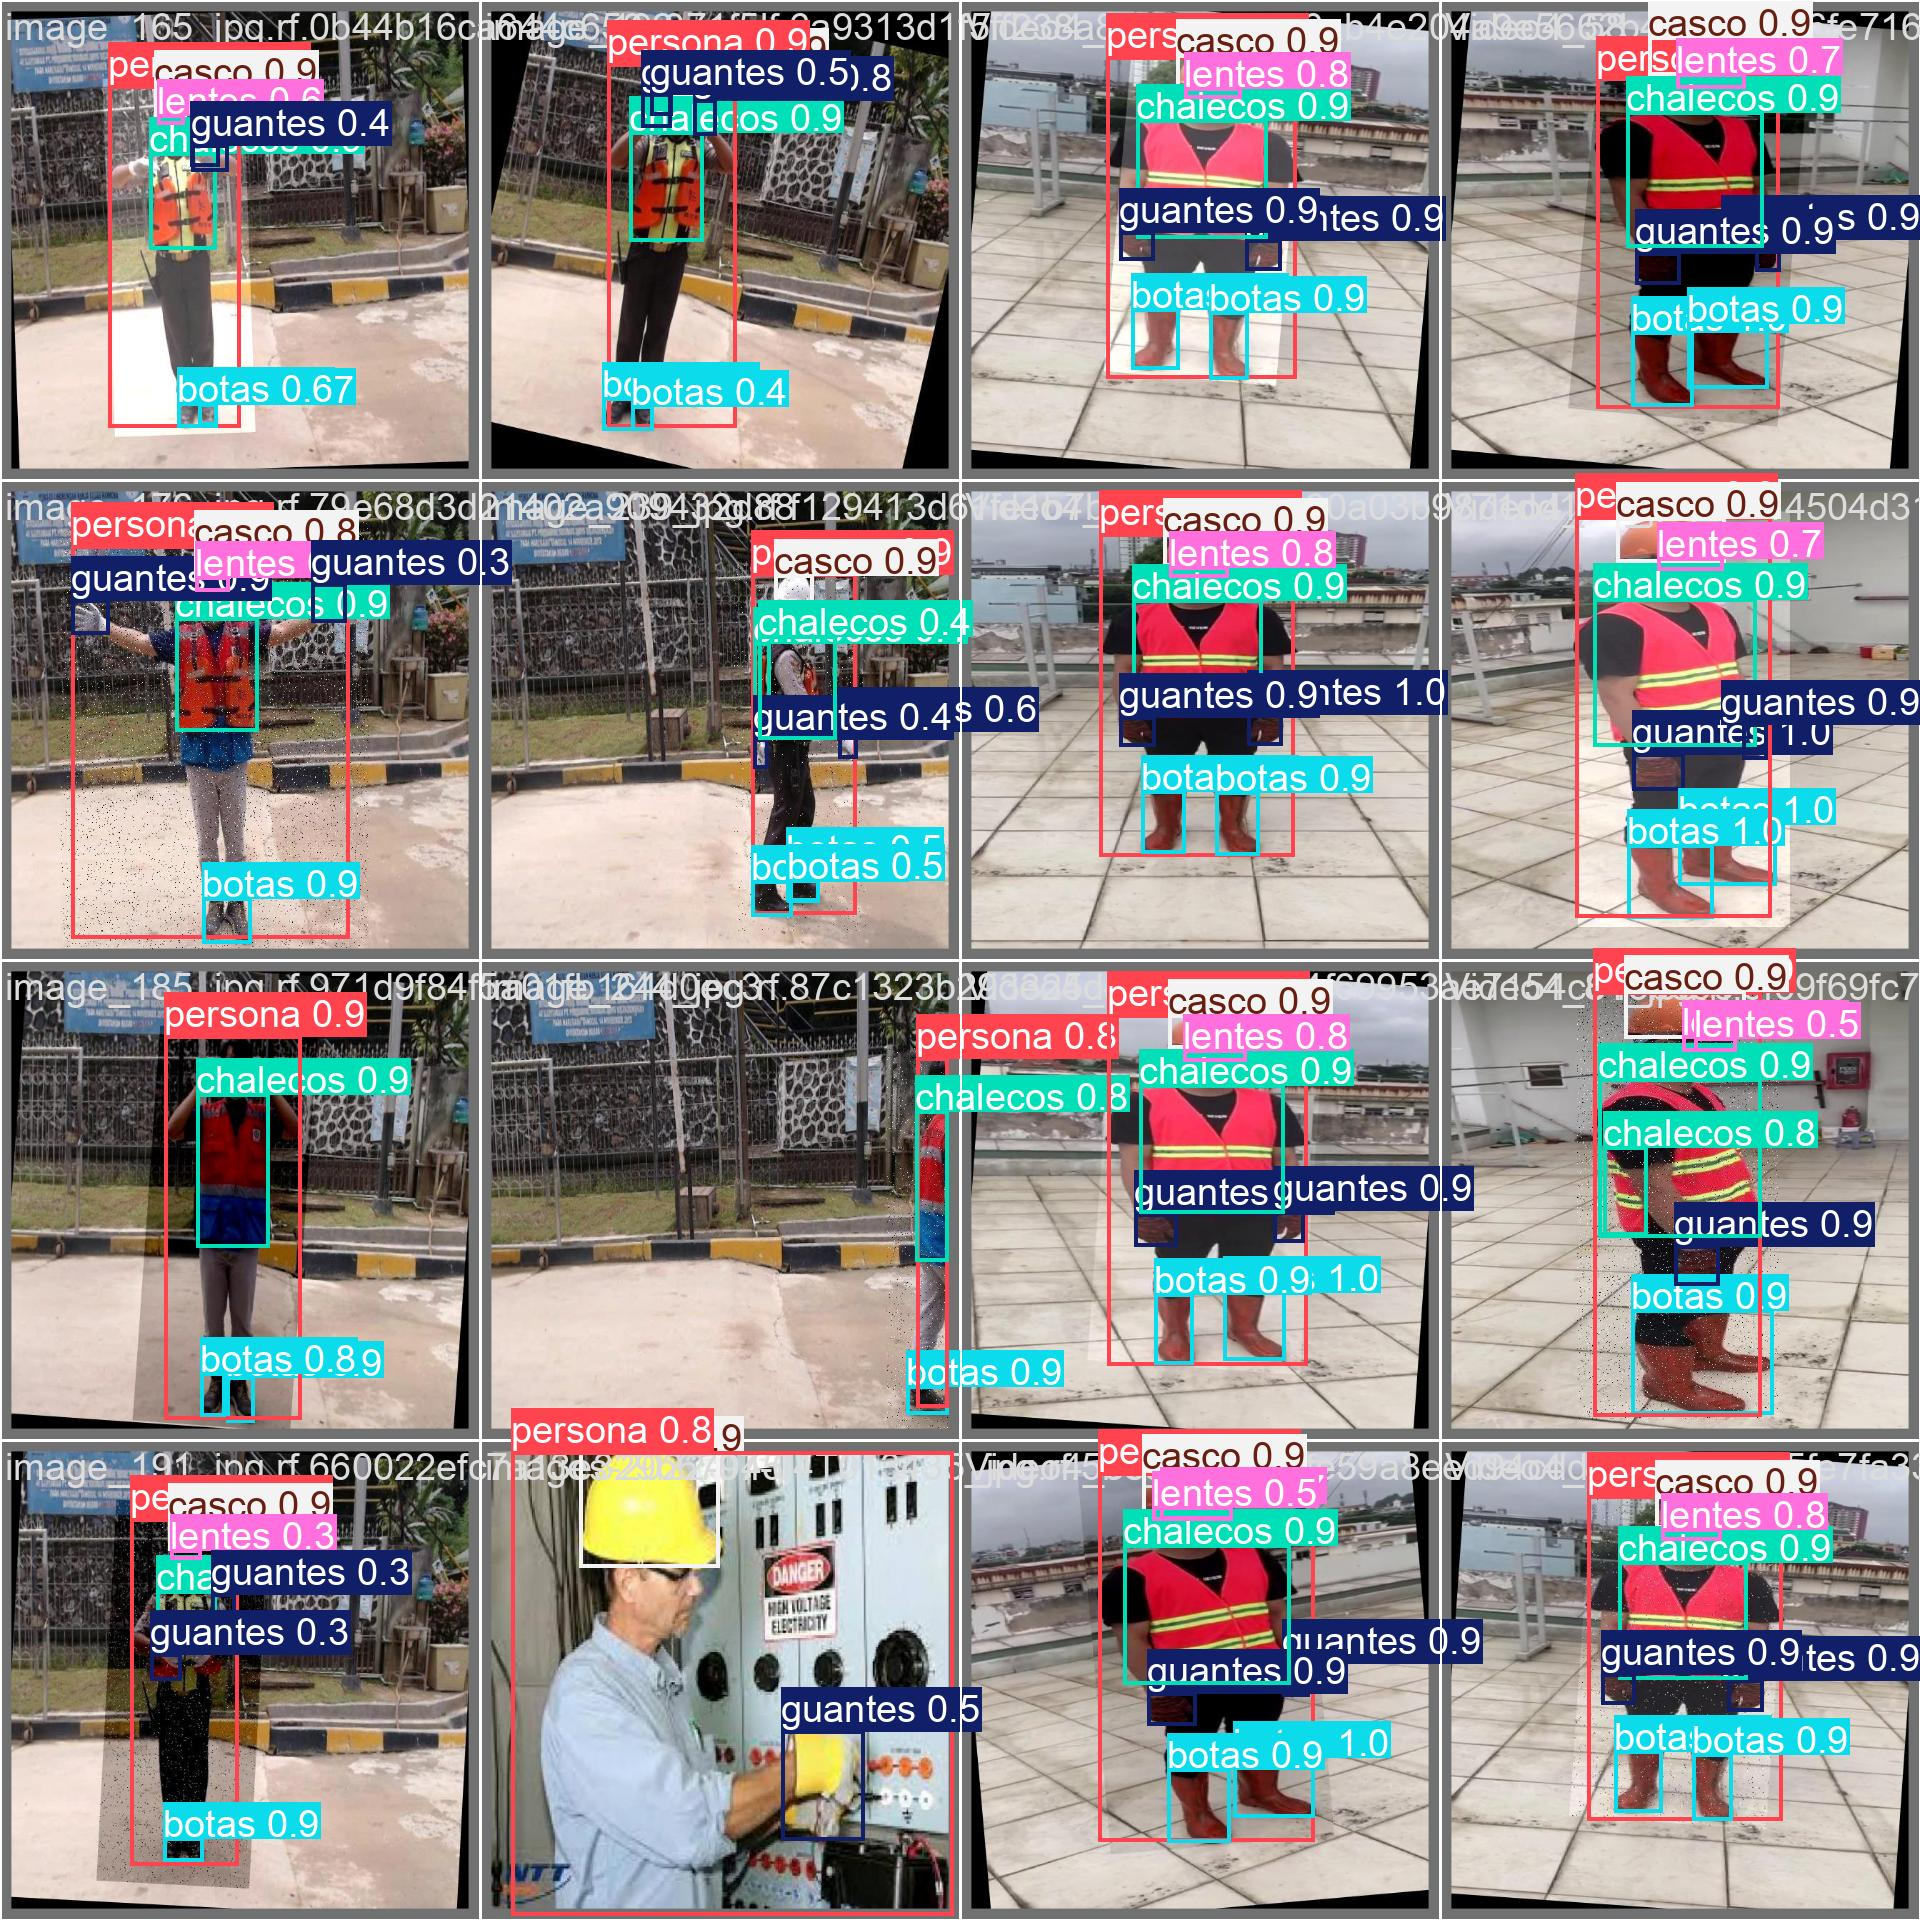

In [12]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

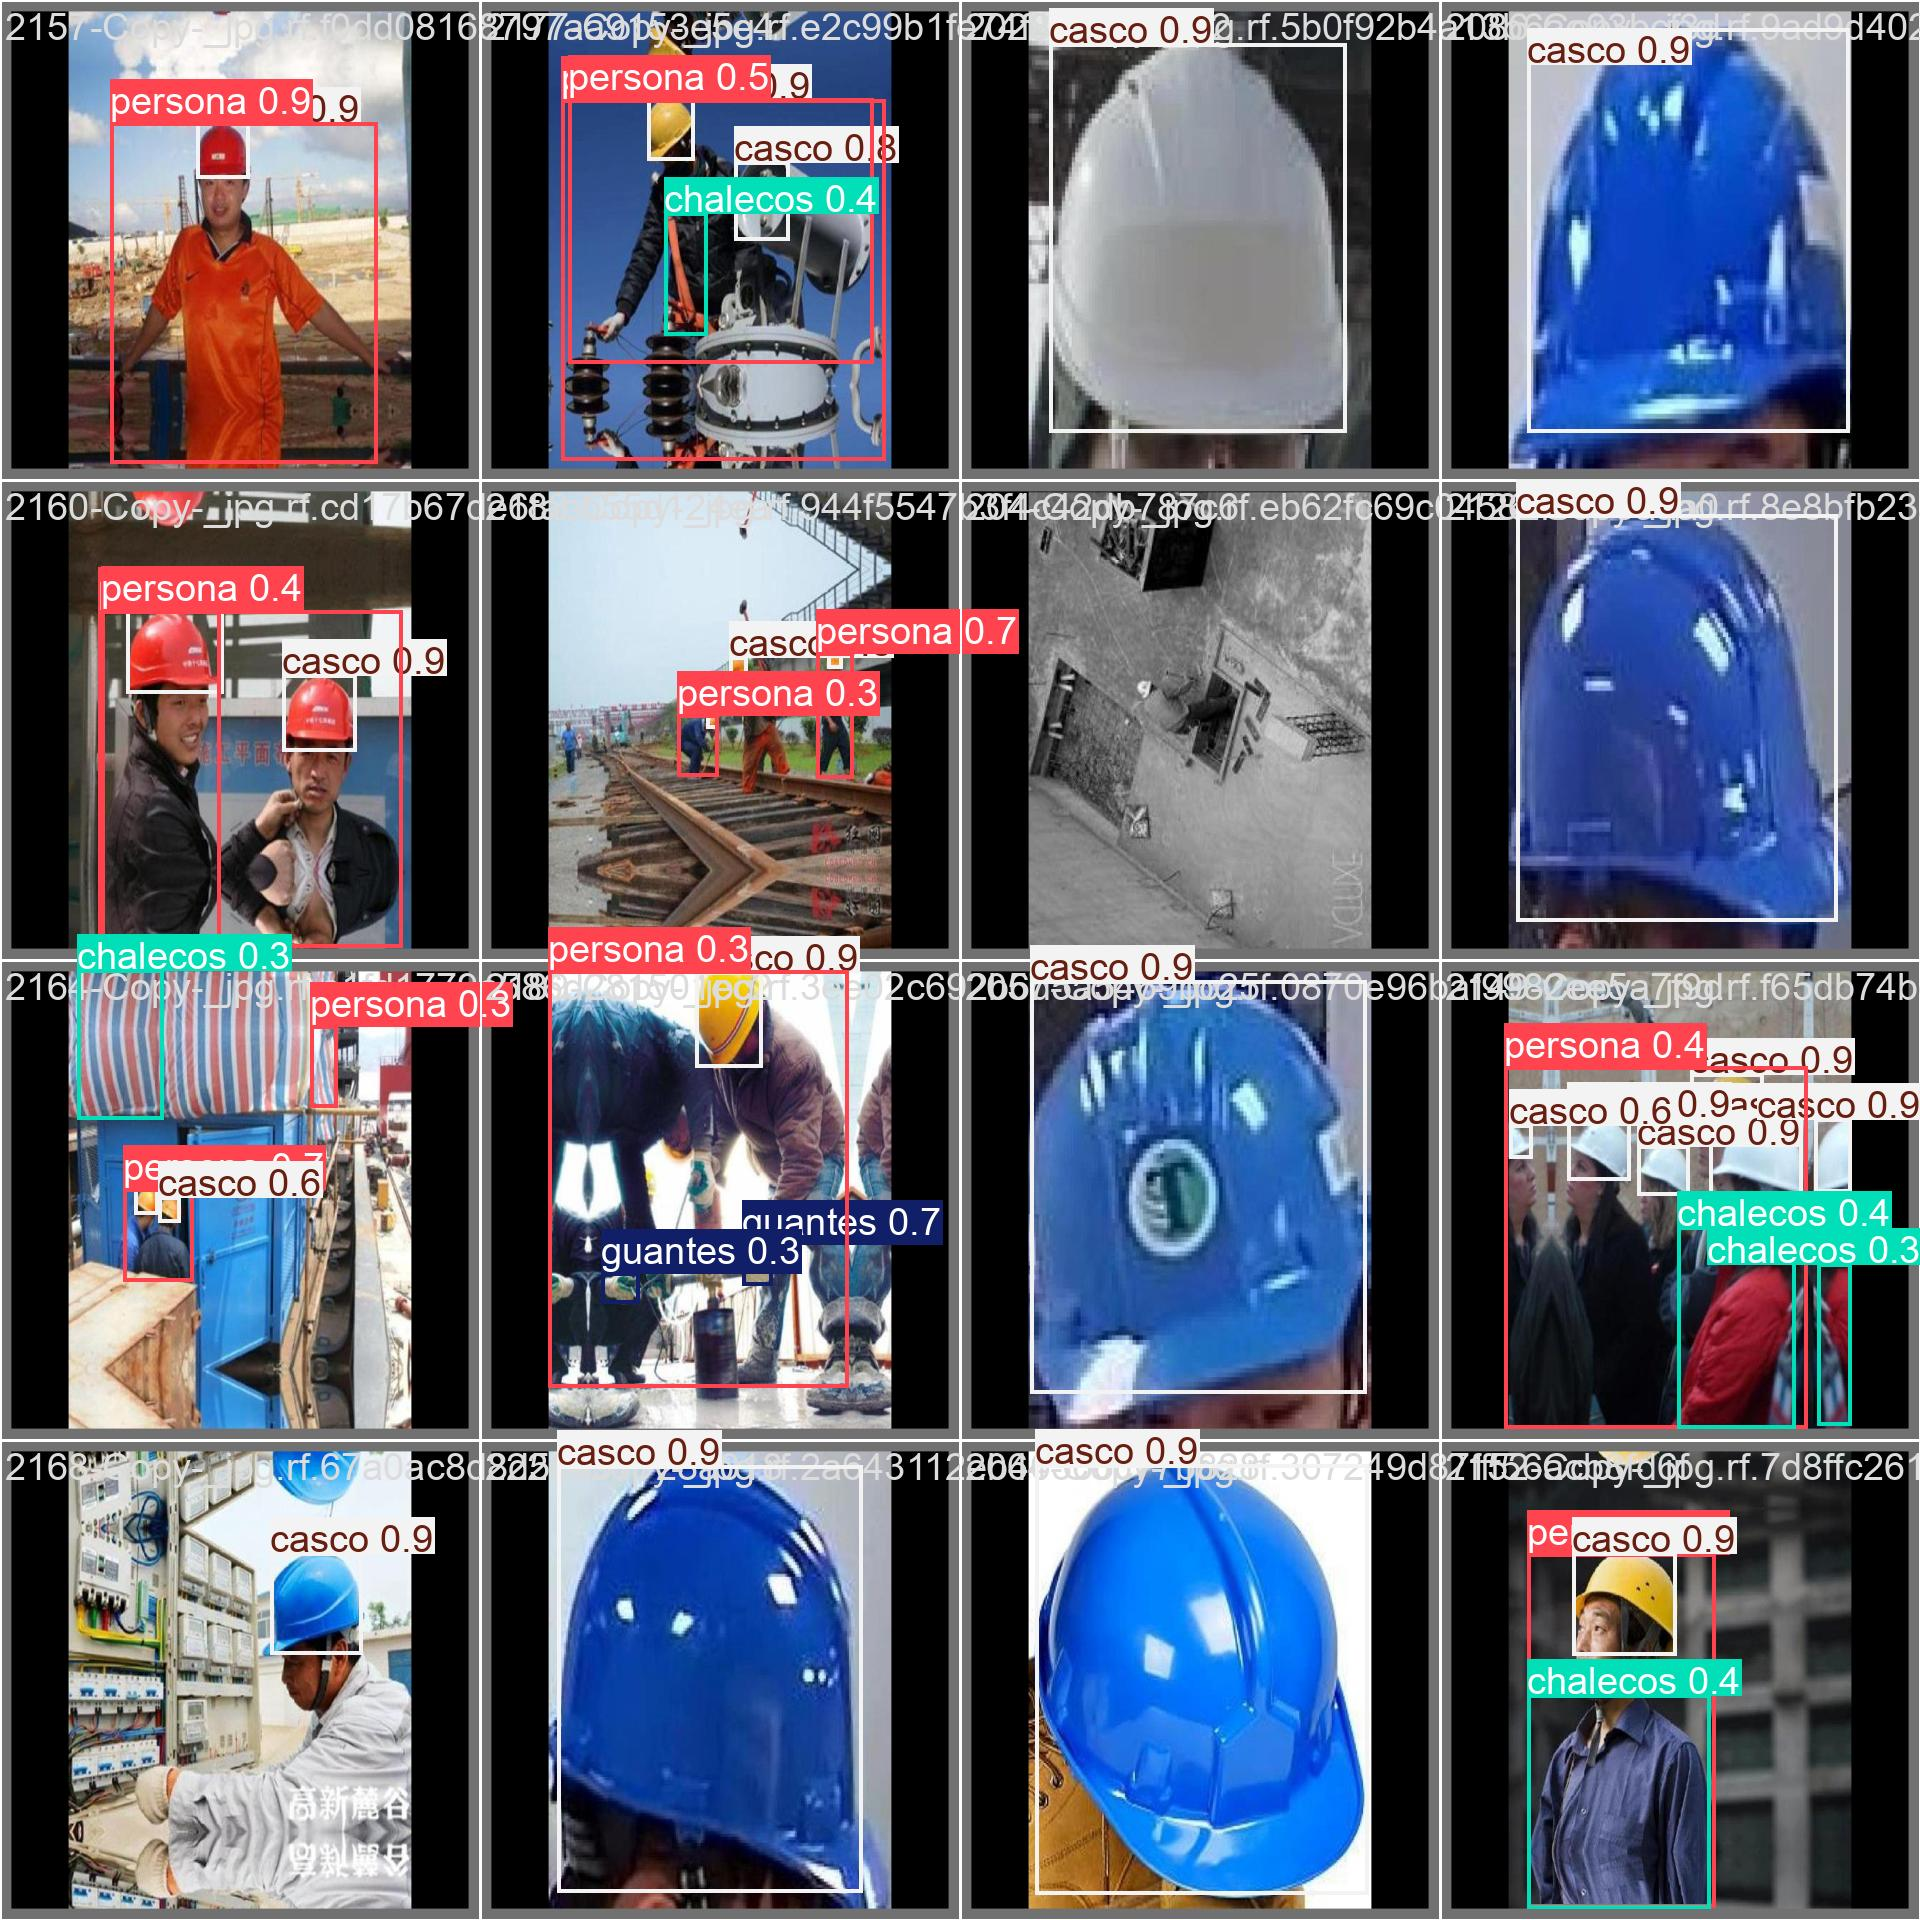

In [13]:
Image("/content/runs/detect/train/val_batch1_pred.jpg", width=600)

In [14]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

image 1/272 /content/EPP-CONSTRUCCION-5/test/images/140-Copy-_jpg.rf.365ac4d151d7dcc6b0ed616cfc186d99.jpg: 640x640 1 botas, 4 cascos, 5 chalecoss, 4 personas, 12.8ms
image 2/272 /content/EPP-CONSTRUCCION-5/test/images/197-Copy-_jpg.rf.48b443cff6644f3df9c6c99a5e0e3c37.jpg: 640x640 3 botass, 5 cascos, 4 chalecoss, 2 personas, 8.9ms
image 3/272 /content/EPP-CONSTRUCCION-5/test/images/201-Copy-_jpg.rf.cc5a7640b9db3492abf3ba3f5aad5f63.jpg: 640x640 2 cascos, 8.8ms
image 4/272 /content/EPP-CONSTRUCCION-5/test/images/2014-Copy-_jpg.rf.ebe63e9890fb5ed9b1911292f5004e38.jpg: 640x640 1 casco, 8.1ms
image 5/272 /content/EPP-CONSTRUCCION-5/test/images/2072-Copy-_jpg.rf.85a694f3ae974d1122317f7b605acb95.jpg: 640x640 1 casco, 8.1ms
image 6/272 /content/EPP-CONSTRUCCION-5/test/images/2082-Copy-_jpg.rf.e409f2aa2711e28521f603a5de2f0865.jpg: 6

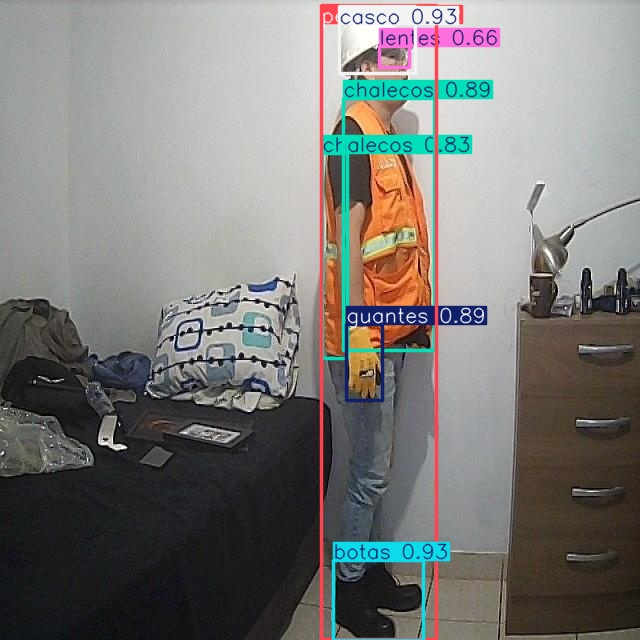

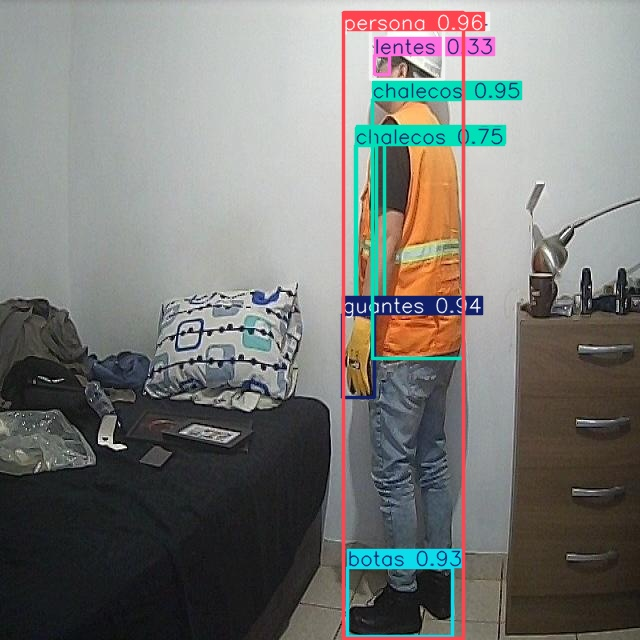

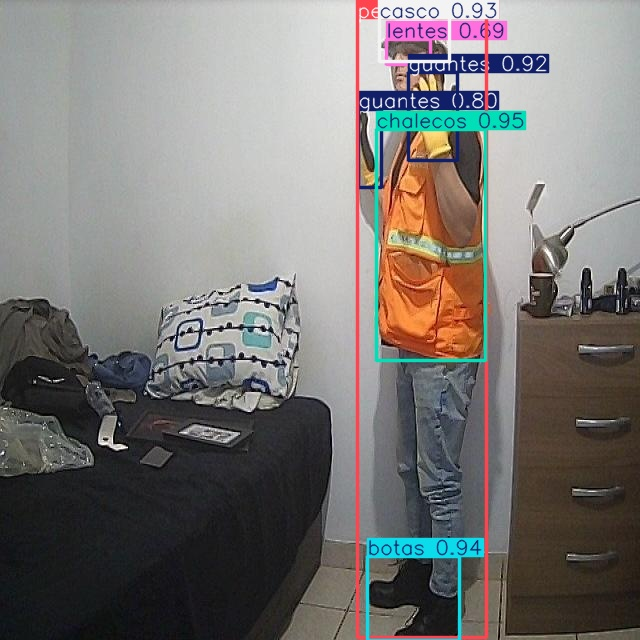

In [15]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [16]:
from IPython.display import HTML
from base64 import b64encode
import os

# Cambia esta ruta a la del video que deseas usar
save_path = '/content/ppe-1.mp4'  # Reemplaza con la ruta de tu video

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

# Comprimir el video usando ffmpeg
os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Leer el video comprimido
mp4 = open(compressed_path, 'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

# Mostrar el video en el notebook
HTML(f"""
<video width=640 controls>
      <source src="{data_url}" type="video/mp4">
</video>
""")
